My Goal is to understand one of the fundemantals of Machine Learning techniques. 

From my understanding, Auto-regression is based on creating a function f_t(y) with y the variable to be "analysed", in function of time. 

Let's start by importing our dataset

**0. Installing Dependencies**

In [6]:
#Dependencies
%pip install openpyxl matplotlib pandas darts statsmodels -q


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


**1. Retrieving Data**

Define Total Data to be retrieved

In [7]:
total = 300

In [8]:
import pandas as pd
file_path = '../../Data/EnergieUebersichtCH-2024.xlsx' 
xls = pd.ExcelFile(file_path)
#Dataframe in this case in the 3rd sheet Zeitreihen0h15
df = pd.read_excel(xls, sheet_name='Zeitreihen0h15', header=1, nrows=total)
print(df.columns)


Index(['Zeitstempel', 'kWh', 'kWh.1', 'kWh.2', 'kWh.3', 'kWh.4', 'kWh.5',
       'kWh.6', 'kWh.7', 'kWh.8', 'kWh.9', 'kWh.10', 'kWh.11', 'kWh.12',
       'kWh.13', 'kWh.14', 'kWh.15', 'kWh.16', 'kWh.17', 'kWh.18', 'kWh.19',
       'Euro/MWh', 'Euro/MWh.1', 'Euro/MWh.2', 'Euro/MWh.3', 'kWh.20',
       'kWh.21', 'kWh.22', 'kWh.23', 'kWh.24', 'kWh.25', 'kWh.26', 'kWh.27',
       'kWh.28', 'kWh.29', 'kWh.30', 'kWh.31', 'kWh.32', 'kWh.33', 'kWh.34',
       'kWh.35', 'kWh.36', 'kWh.37', 'kWh.38', 'kWh.39', 'kWh.40', 'kWh.41',
       'kWh.42', 'kWh.43', 'kWh.44', 'kWh.45', 'kWh.46', 'kWh.47', 'kWh.48',
       'kWh.49', 'kWh.50', 'kWh.51', 'kWh.52', 'kWh.53', 'kWh.54', 'kWh.55',
       'kWh.56', 'kWh.57', 'kWh.58', 'kWh.59'],
      dtype='object')


**2. Data variables / potential parameters** 

**Pre-processing step** Renaming column names to be clear

In [9]:
column_mapping = {
    'kWh': 'Total Energy Consumed by End Users (kWh)',
    'kWh.1': 'Total Energy Production (kWh)',
    'kWh.2': 'Total Energy Consumption (kWh)',
    'kWh.3': 'Net Outflow (kWh)',
    'kWh.4': 'Grid Feed-In (kWh)',
    'kWh.5': 'Positive Secondary Control Energy (kWh)',
    'kWh.6': 'Negative Secondary Control Energy (kWh)',
    'kWh.7': 'Positive Tertiary Control Energy (kWh)',
    'kWh.8': 'Negative Tertiary Control Energy (kWh)'
}

df.rename(columns=column_mapping, inplace=True)

The goal is to predict the next element of the Total Energy Consumption columb:

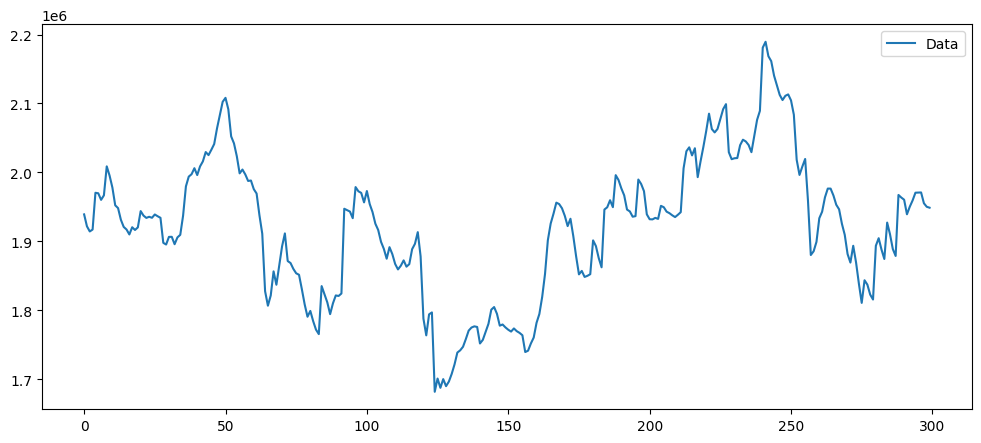

In [10]:
energy_consumption_data = df['Total Energy Consumption (kWh)'].dropna().values 
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(energy_consumption_data, label='Data')
plt.plot(range(len(energy_consumption_data), len(energy_consumption_data)))
plt.legend()
plt.show()

Now that we have the data correct set up, let's create two tables: weights, prev_values and the bias

In [11]:
weights = [0 for i in range(100)]
prev_values = [0 for i in range(100)]
y = 100
bias = 0

energy_consumption_data = df['Total Energy Consumption (kWh)'].dropna().values
f_y = df['Total Energy Consumption (kWh)'][y]
print(f_y)


1973067.723669


We're going to generate a darts time_series version of the data

In [12]:
from darts import TimeSeries
time_series = TimeSeries.from_values(energy_consumption_data)


Plot notre time_series

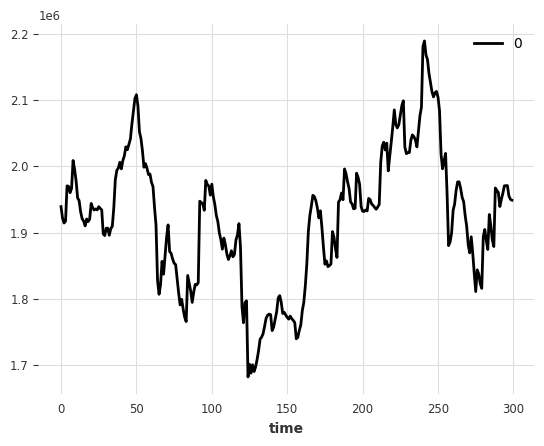

In [13]:
time_series.plot()
plt.show()

Train an AutoRegression (AR) Model, using ARModel from module 8

Splitting data to 90, 10% training testing

In [14]:
train, test = time_series.split_before(0.9)  

Initialiser notre model

In [15]:
from darts.models import ARIMA
arima_model = ARIMA(p=100)
arima_model.fit(train)

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(p=100, d=1, q=0, seasonal_order=(0, 0, 0, 0), trend=None, random_state=None, add_encoders=None)

Prediction of test data

We use .predict to forecast the next `len(test)` values

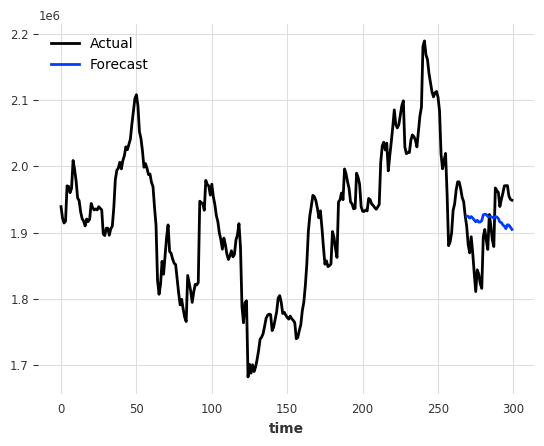

In [16]:
forecast = arima_model.predict(len(test))

# Plot actual vs predicted values
time_series.plot(label="Actual")
forecast.plot(label="Forecast")
plt.legend()
plt.show()


ARIMA does not seem like a good fit!

Coudln't find a model named AR in Darts, however LSTMs,  RNNs can be used as AR models?

I'm going to use statsmodels for AR

In [17]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

In [18]:
lags = 10
model = AutoReg(energy_consumption_data, lags)
model_fitted = model.fit()   
print(model_fitted.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  300
Model:                    AutoReg(10)   Log Likelihood               -3319.810
Method:               Conditional MLE   S.D. of innovations          22667.400
Date:                Wed, 30 Apr 2025   AIC                           6663.621
Time:                        10:18:46   BIC                           6707.659
Sample:                            10   HQIC                          6681.265
                                  300                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.921e+04   2.75e+04      2.517      0.012    1.53e+04    1.23e+05
y.L1           1.2208      0.058     20.874      0.000       1.106       1.335
y.L2          -0.2907      0.091     -3.178      0.0

In [19]:
forecast = model_fitted.predict(start=len(energy_consumption_data), end=len(energy_consumption_data) + 100)
print(forecast)


[1951630.46181526 1947187.2488369  1945665.85190249 1943508.23523965
 1943901.8893254  1939980.93961262 1938994.96453856 1937807.84723846
 1938052.98984539 1935669.1670061  1934812.95926168 1933655.65051149
 1933538.34995343 1931872.40416685 1931233.36584964 1930330.30292708
 1930072.3328166  1928895.46564631 1928355.45377662 1927623.45757448
 1927324.17723391 1926476.13915545 1926036.27868866 1925456.48548738
 1925158.2967488  1924535.07230004 1924172.55731415 1923715.00733901
 1923442.99047138 1922977.54596723 1922680.20949133 1922319.68589051
 1922081.45000254 1921729.04939549 1921485.64342729 1921201.69236863
 1920998.78079144 1920728.86136716 1920530.25004667 1920306.39360322
 1920136.56862604 1919927.94277059 1919766.37053519 1919589.67243657
 1919449.26770968 1919286.82598024 1919155.75968533 1919016.0753566
 1918900.98598577 1918773.77615183 1918667.72085862 1918557.12992995
 1918463.37459359 1918363.30296993 1918277.67103228 1918189.98751836
 1918113.95775237 1918034.95653459 

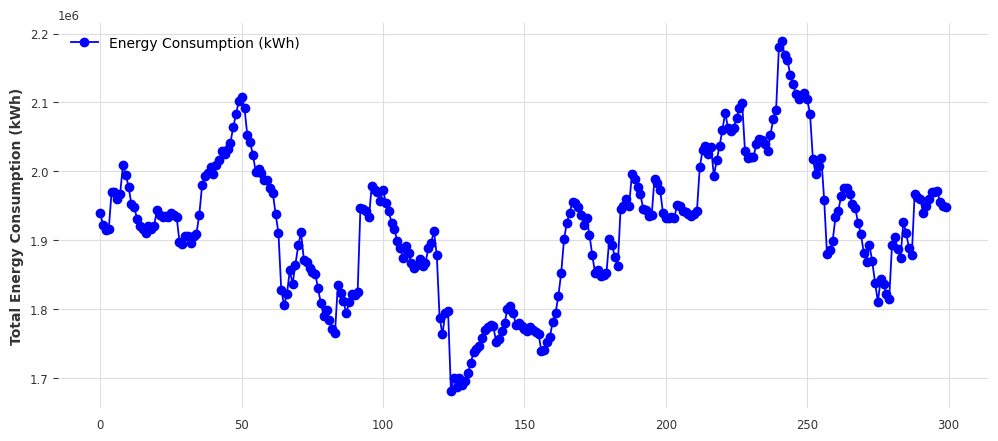

In [20]:
energy_consumption_data = df['Total Energy Consumption (kWh)'].dropna().values 
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(energy_consumption_data, label="Energy Consumption (kWh)", color='blue', marker='o')
plt.ylabel("Total Energy Consumption (kWh)")
plt.legend()
plt.show()



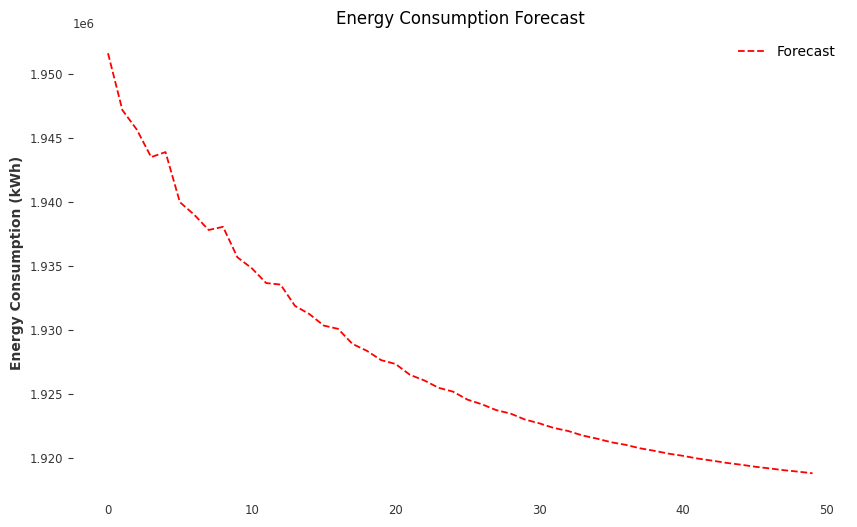

In [21]:
import numpy as np
forecast_periods = 50
plt.figure(figsize=(10, 6))
plt.plot(forecast[:forecast_periods], label='Forecast', color='red', linestyle='--')

plt.ylabel('Energy Consumption (kWh)')
plt.title('Energy Consumption Forecast')
plt.legend()
plt.grid()
plt.show()

Going to create a combined dataset: 300 last actual points and 50 forecasted points


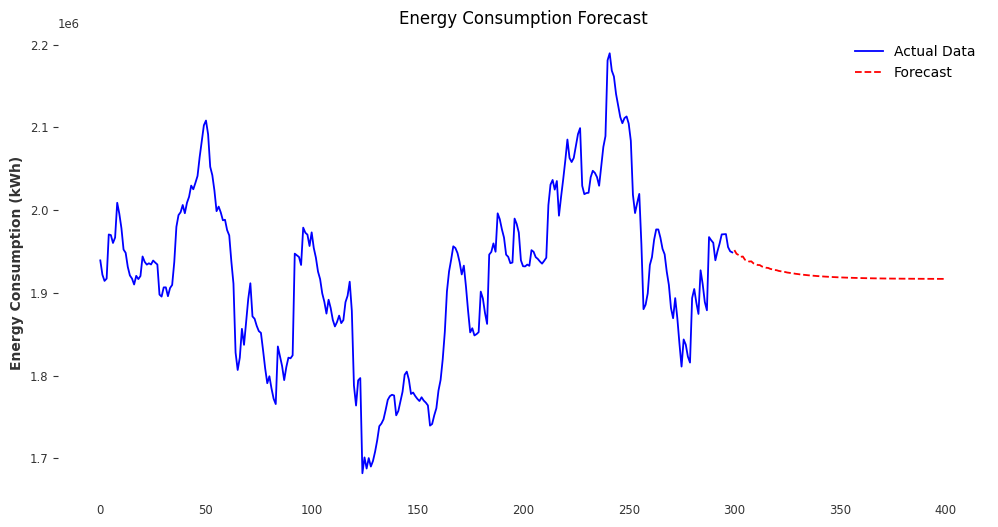

In [22]:
combined_data = np.concatenate((energy_consumption_data, forecast))

plt.figure(figsize=(12, 6))

plt.plot(energy_consumption_data, label='Actual Data', color='blue')
plt.plot(np.arange(len(energy_consumption_data), len(combined_data)), forecast, label='Forecast', color='red', linestyle='--')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Energy Consumption Forecast')
plt.legend()
plt.grid()
plt.show()


on teste avec lag = 30

In [23]:
model = AutoReg(energy_consumption_data, lags=30)  
forecast = model_fitted.predict(start=len(energy_consumption_data), end=len(energy_consumption_data) + 100)

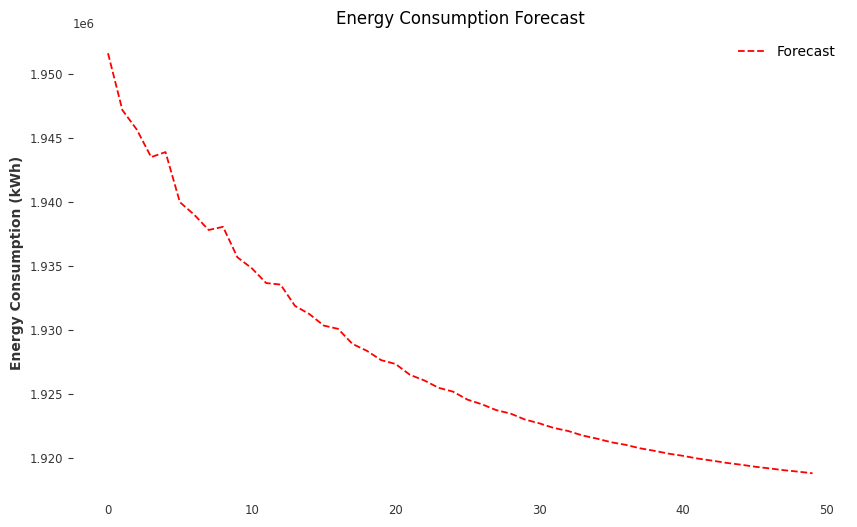

In [24]:
import numpy as np
forecast_periods = 50
plt.figure(figsize=(10, 6))
plt.plot(forecast[:forecast_periods], label='Forecast', color='red', linestyle='--')

plt.ylabel('Energy Consumption (kWh)')
plt.title('Energy Consumption Forecast')
plt.legend()
plt.grid()
plt.show()

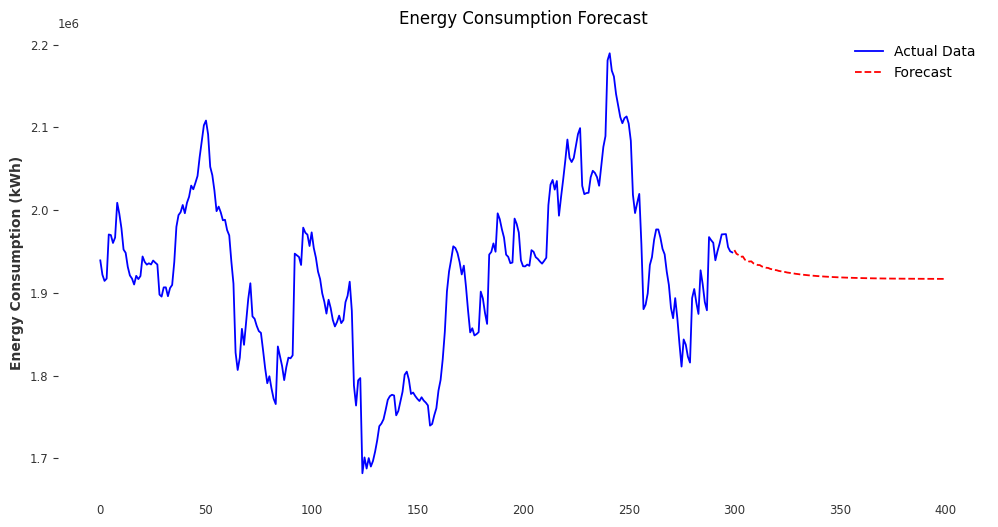

In [25]:
combined_data = np.concatenate((energy_consumption_data, forecast))

plt.figure(figsize=(12, 6))

plt.plot(energy_consumption_data, label='Actual Data', color='blue')
plt.plot(np.arange(len(energy_consumption_data), len(combined_data)), forecast, label='Forecast', color='red', linestyle='--')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Energy Consumption Forecast')
plt.legend()
plt.grid()
plt.show()


Vector Auto-regression

Je vais utiliser statsmodels pour VAR

Data cleaning, converts everything to numeric, replacing errors with NaN

In [26]:
print(df)

          Zeitstempel  Total Energy Consumed by End Users (kWh)  \
0    01.01.2024 00:15                              1.443842e+06   
1    01.01.2024 00:30                              1.442366e+06   
2    01.01.2024 00:45                              1.432568e+06   
3    01.01.2024 01:00                              1.420472e+06   
4    01.01.2024 01:15                              1.445856e+06   
..                ...                                       ...   
295  04.01.2024 02:00                              1.356024e+06   
296  04.01.2024 02:15                              1.381558e+06   
297  04.01.2024 02:30                              1.362220e+06   
298  04.01.2024 02:45                              1.349252e+06   
299  04.01.2024 03:00                              1.338703e+06   

     Total Energy Production (kWh)  Total Energy Consumption (kWh)  \
0                      1296448.710                    1.939192e+06   
1                      1294126.969                    1

In [27]:
df = df.apply(pd.to_numeric, errors='coerce') 

Only going to consider first 6 rows

In [28]:
df = df.iloc[:, :6]

In [29]:
df_cleaned = df.dropna()

In [30]:
df = df.drop(columns=['Zeitstempel'])

Split testing 20-80 ish

In [31]:
test_total = int(0.1*total)

In [32]:
train_data = df.iloc[:-test_total]  
test_data = df.iloc[-test_total:]  

Initialize VAR model

In [33]:
from statsmodels.tsa.api import VAR
model = VAR(train_data)

choose how many last values to rely on: here =5

In [34]:
print(df.shape)  

(300, 5)


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)  


In [36]:
p = 6
fitted_model = model.fit(p) 

forecast next 20%

In [37]:
forecast = fitted_model.forecast(train_data.values[-p:], steps=test_total) 

In [38]:
correlation_matrix = df.corr()
print(correlation_matrix)


                                          Total Energy Consumed by End Users (kWh)  \
Total Energy Consumed by End Users (kWh)                                  1.000000   
Total Energy Production (kWh)                                             0.829660   
Total Energy Consumption (kWh)                                           -0.023245   
Net Outflow (kWh)                                                        -0.695766   
Grid Feed-In (kWh)                                                        0.705428   

                                          Total Energy Production (kWh)  \
Total Energy Consumed by End Users (kWh)                       0.829660   
Total Energy Production (kWh)                                  1.000000   
Total Energy Consumption (kWh)                                -0.246814   
Net Outflow (kWh)                                             -0.906571   
Grid Feed-In (kWh)                                             0.958443   

                                

Trouver tout les variables très corrolées

In [39]:
correlation_threshold = 0.9
high_correlation = correlation_matrix.abs() > correlation_threshold
print(high_correlation)

                                          Total Energy Consumed by End Users (kWh)  \
Total Energy Consumed by End Users (kWh)                                      True   
Total Energy Production (kWh)                                                False   
Total Energy Consumption (kWh)                                               False   
Net Outflow (kWh)                                                            False   
Grid Feed-In (kWh)                                                           False   

                                          Total Energy Production (kWh)  \
Total Energy Consumed by End Users (kWh)                          False   
Total Energy Production (kWh)                                      True   
Total Energy Consumption (kWh)                                    False   
Net Outflow (kWh)                                                  True   
Grid Feed-In (kWh)                                                 True   

                                

In [40]:
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)

I'm going to compare forecast with actual data for the same rows

In [41]:
from statsmodels.tools.eval_measures import rmse

print("Forecast:")
print(forecast_df)


Forecast:
     Total Energy Consumed by End Users (kWh)  Total Energy Production (kWh)  \
270                              1.774337e+06                   1.756985e+06   
271                              1.757732e+06                   1.726923e+06   
272                              1.735687e+06                   1.673348e+06   
273                              1.716292e+06                   1.642859e+06   
274                              1.698489e+06                   1.621562e+06   
275                              1.684576e+06                   1.606738e+06   
276                              1.669781e+06                   1.591397e+06   
277                              1.658279e+06                   1.583608e+06   
278                              1.648917e+06                   1.582046e+06   
279                              1.642517e+06                   1.585049e+06   
280                              1.635722e+06                   1.588643e+06   
281                           

Root mean square deviation for average difference between values predicted by a model and the actual values

In [42]:
rmse_score = rmse(test_data, forecast_df)
print(f"RMSE: {rmse_score}")

RMSE: [130103.27590787 184491.93246185  38814.98312649 187947.3207765
 169919.6985873 ]


In [43]:
column_name = 'Total Energy Consumption (kWh)'

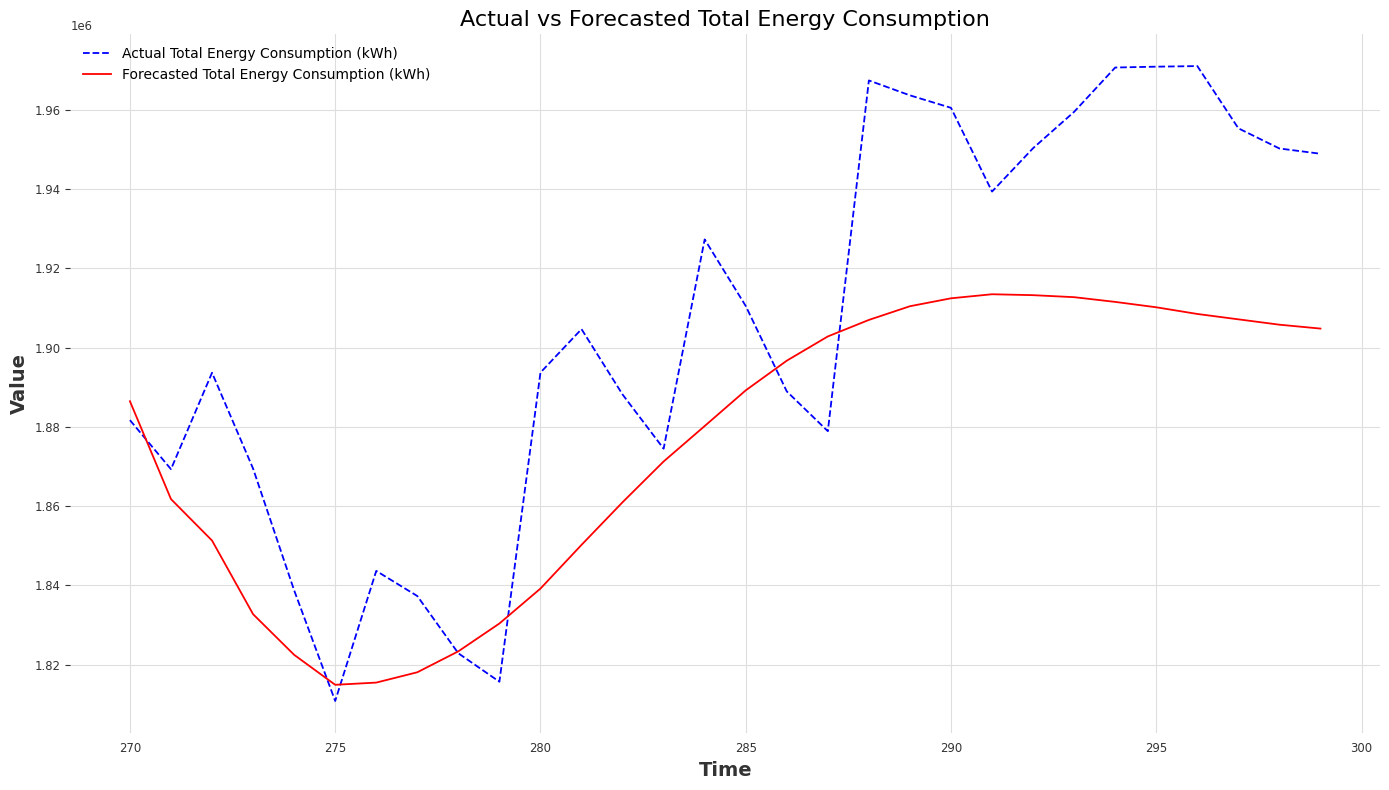

In [44]:
plt.figure(figsize=(14, 8))
plt.plot(test_data.index, test_data[column_name], label=f'Actual {column_name}', linestyle='--', color='blue')  
plt.plot(forecast_df.index, forecast_df[column_name], label=f'Forecasted {column_name}', color='red')  
plt.title('Actual vs Forecasted Total Energy Consumption', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

J'ai eu plusieurs forecasts pour chaque variable, est-ce le but?

In [45]:
def plot_actual_vs_forecasted(col):
    plt.figure(figsize=(14, 8))
    plt.plot(test_data.index, test_data[col], label=f'Actual {col}', linestyle='--', color='blue')
    plt.plot(forecast_df.index, forecast_df[col], label=f'Forecasted {col}', color='red')
    
    plt.title(f'Actual vs Forecasted Data for {col}', fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

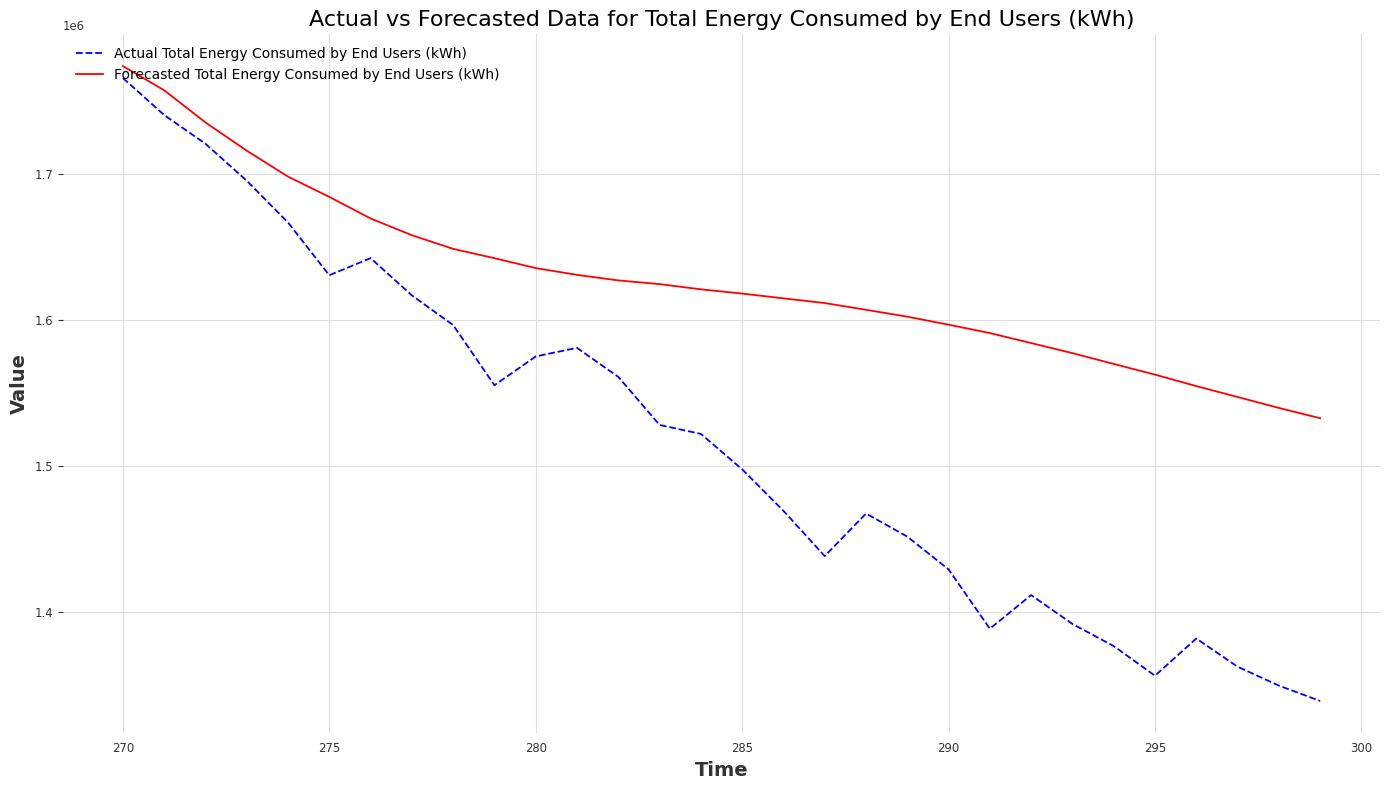

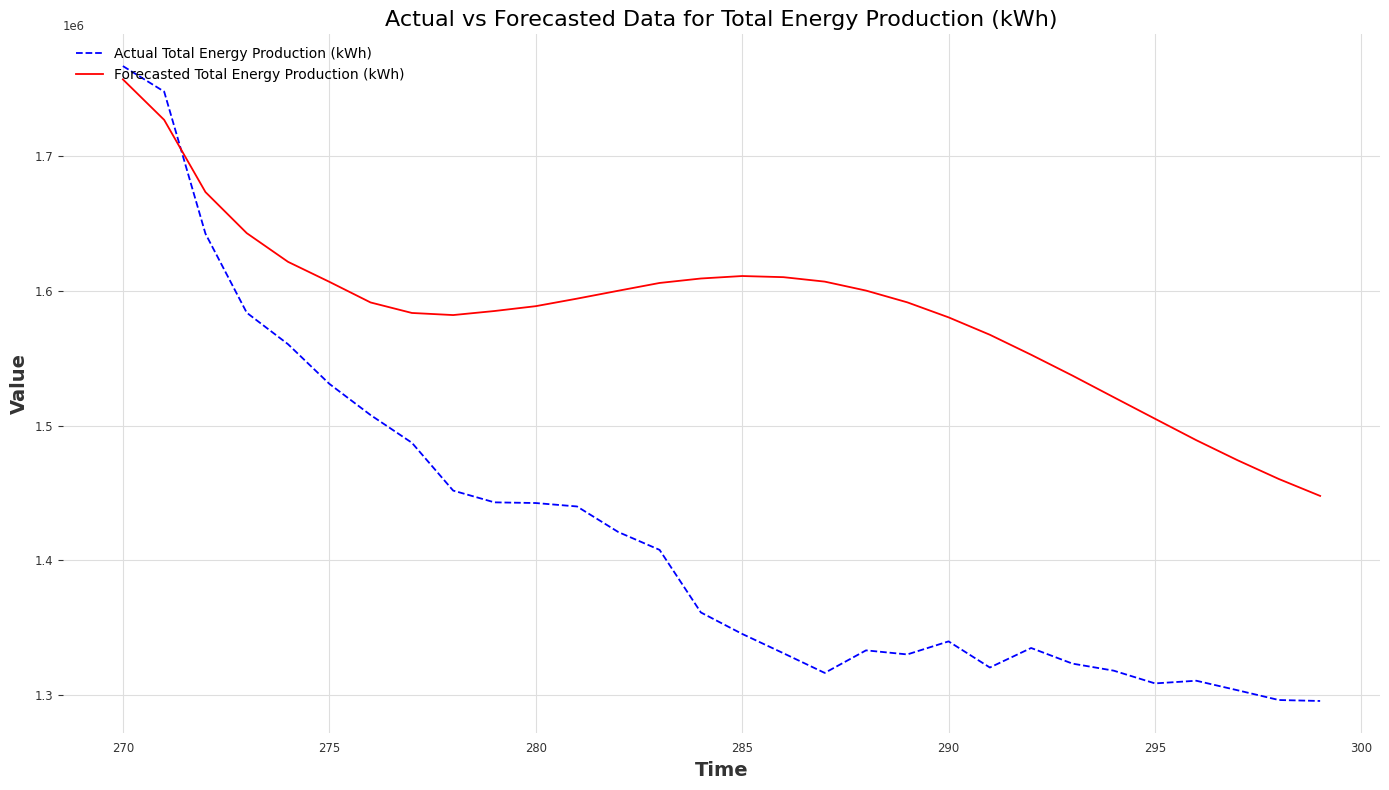

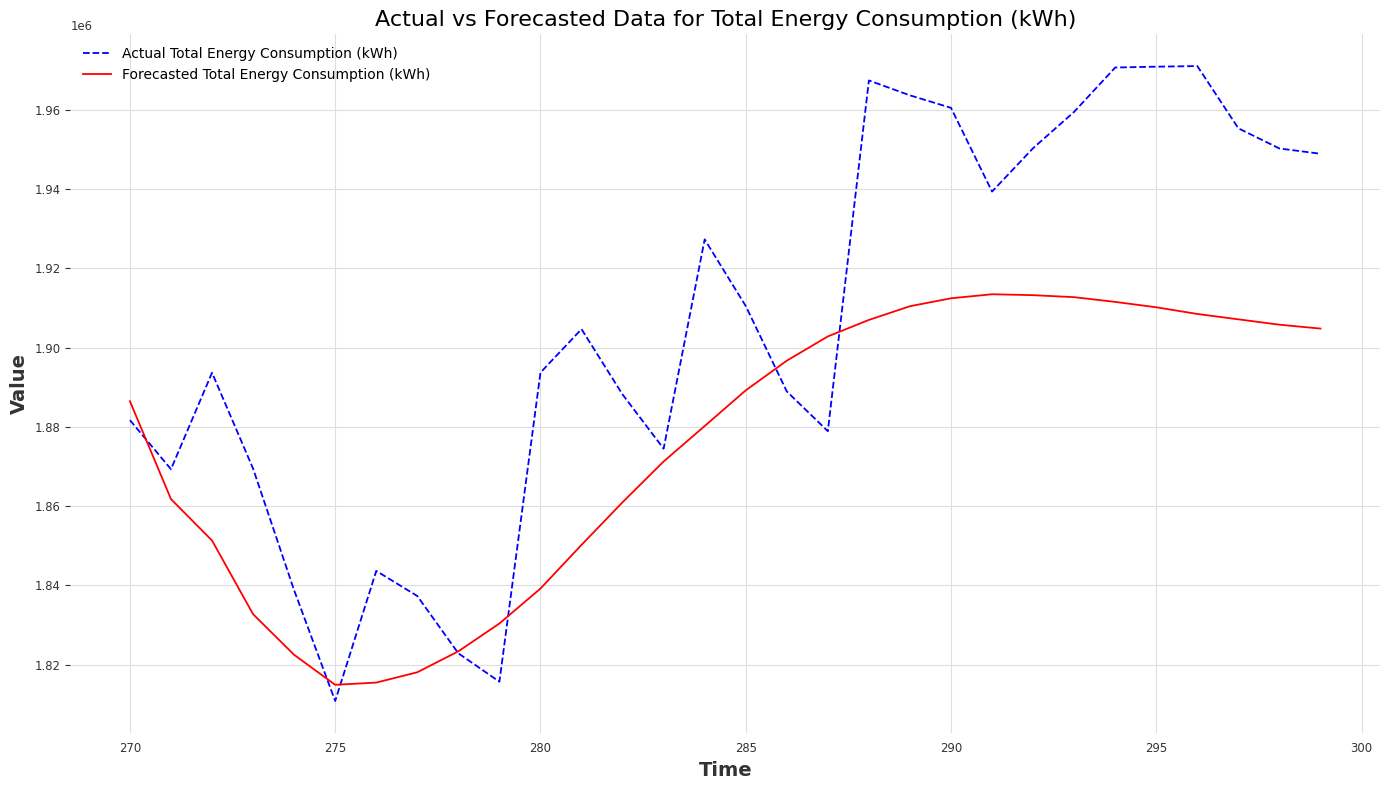

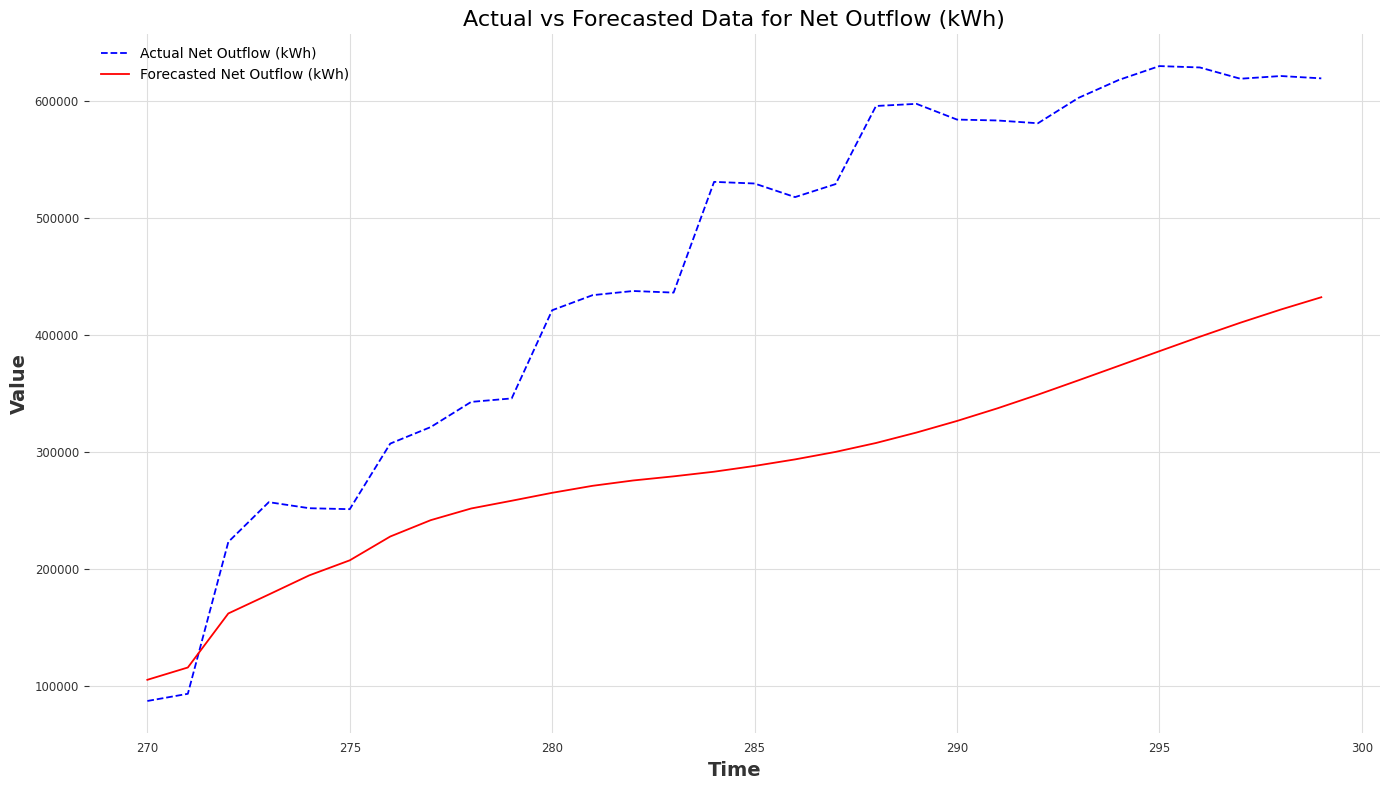

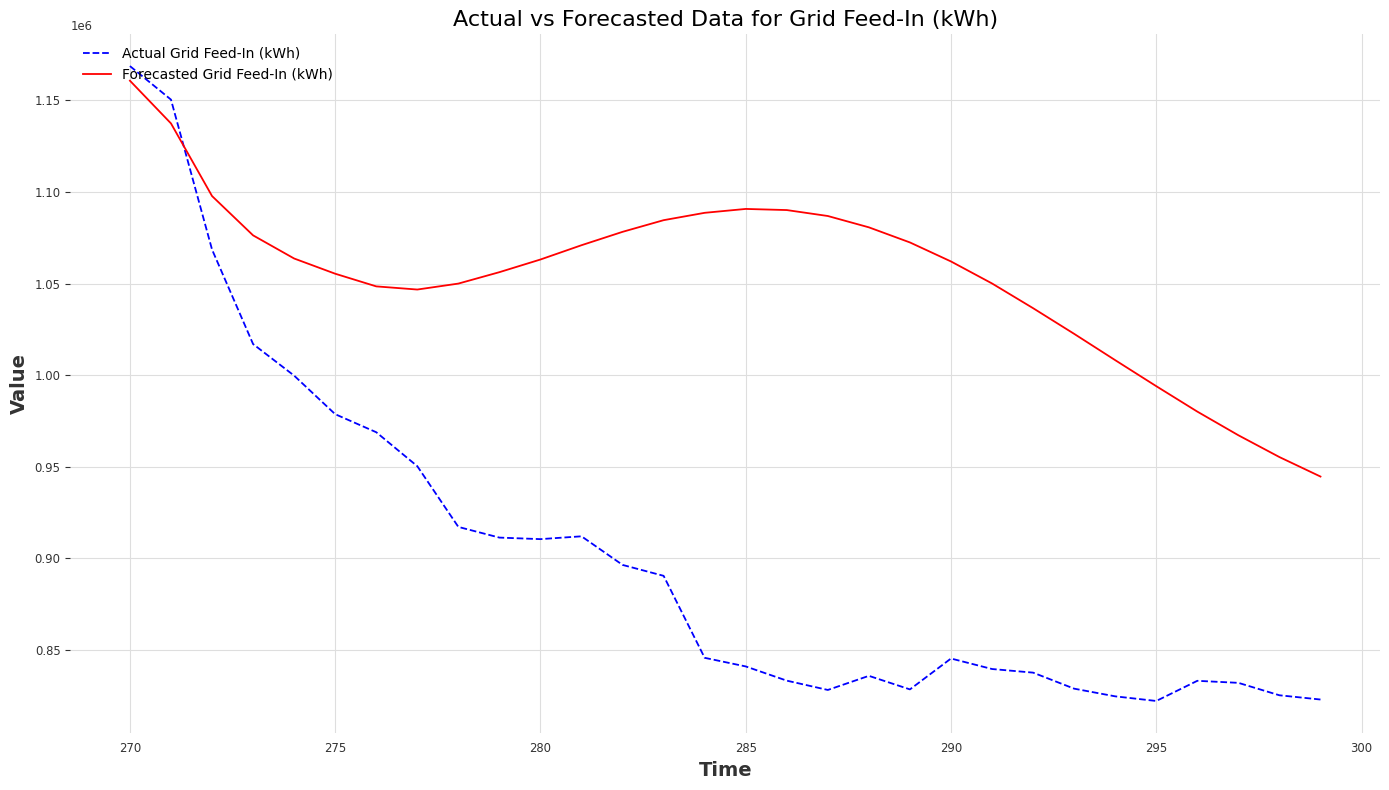

In [46]:
for col in forecast_df.columns:
    plot_actual_vs_forecasted(col)

Stationarity of my Time Series

Is my distribution white noise?

White noise Xt = Wt, where Wt ∼WN (0,σ2), that is Wt ∼F iid for some distribution
F with mean 0 and variance σ2. Special case is Gaussian White noise, where F = Φ

**III: Time Series Analysis**

Is my distribution white noise?

White noise Xt = Wt, where Wt ∼WN (0,σ2), that is Wt ∼F iid for some distribution
F with mean 0 and variance σ2. The point is: white noise is stationary, that should be one of the first checks

**III. 1. Stationarity of my Time Series**

**III. 1.a. Informal check**

**III. 1.a. Mean Calculation**

Calculating the mean of my time series (Total Power Consumption in the Grid)

the formula for the mean is: μ = (x₁ + x₂ + ... + xₙ) / n

In [47]:
def mean(data):
    return sum(data) / len(data)

In [48]:
print(mean(energy_consumption_data))

1920658.3941908781


**III. 1.a. Variance Calculation**

Calculating Variance:

Variance = 1/n sum(xi- mean)**2

In [49]:
def variance(data):
    mean_value = mean(data)
    variance = sum((x - mean_value)**2 for x in data) / len(data)
    return variance

In [50]:
print(variance(energy_consumption_data))

10228205813.410938


**III. 1.a. iii. Autocorrelation Calculation**

Informal Test: check if mean, variance are constants

In [51]:
from statsmodels.tsa.stattools import acf

def check_autocorrelation(data, nlags=10, alpha=0.05):
    data = np.asarray(data)
    acf_vals, confint = acf(data, nlags=nlags, alpha=alpha, fft=False)
    
    # display
    for lag in range(1, nlags+1):
        lower, upper = confint[lag]
        print(f"lag {lag:2d} → ACF = {acf_vals[lag]: .4f}  "
              f"{100*(1-alpha):.0f}% CI = [{lower: .4f}, {upper: .4f}]")


In [52]:
check_autocorrelation(energy_consumption_data, nlags=12)

lag  1 → ACF =  0.9698  95% CI = [ 0.8566,  1.0829]
lag  2 → ACF =  0.9296  95% CI = [ 0.7375,  1.1217]
lag  3 → ACF =  0.8920  95% CI = [ 0.6491,  1.1350]
lag  4 → ACF =  0.8593  95% CI = [ 0.5775,  1.1411]
lag  5 → ACF =  0.8115  95% CI = [ 0.4980,  1.1251]
lag  6 → ACF =  0.7662  95% CI = [ 0.4268,  1.1055]
lag  7 → ACF =  0.7260  95% CI = [ 0.3651,  1.0868]
lag  8 → ACF =  0.6918  95% CI = [ 0.3127,  1.0709]
lag  9 → ACF =  0.6489  95% CI = [ 0.2540,  1.0438]
lag 10 → ACF =  0.6101  95% CI = [ 0.2018,  1.0185]
lag 11 → ACF =  0.5772  95% CI = [ 0.1573,  0.9970]
lag 12 → ACF =  0.5512  95% CI = [ 0.1213,  0.9811]


In [53]:
def check_mean_variance(data):
    n = len(data)
    first_half = data[:n//2]
    second_half = data[n//2:]
    
    mean1, var1 = mean(first_half), variance(first_half)
    mean2, var2 = mean(second_half), variance(second_half)
    
    print(f'First half mean: {mean1}, variance: {var1}')
    print(f'Second half mean: {mean2}, variance: {var2}')


In [54]:
check_mean_variance(energy_consumption_data)

First half mean: 1889920.6235622528, variance: 9310672660.567896
Second half mean: 1951396.1648194985, variance: 9256117879.81826


autocorrelation function (ACF) at lag k, for k ≥ 0, of the time series is defined by
rk = sk/ s0 where sk is the autocovariance at lag k

If (Xt) is strictly stationary, then:

(i) ... that is the mean is constant.


(ii) ... that is the covariance is invariant  (source: ETHZ, Time Series Analysis 2022)

Visual Check: Similar values

**III. 1.a. Formal check**

ADF method checks if time series is stationnary

Importing ADF Method

ADF a statistical method used to determine if a time series is stationary. It helps identify whether a series has a unit root, which is a formal indication of non-stationarity. A significant p-value (typically less than 0.05) suggests stationarity (source: Google)

In [55]:
from statsmodels.tsa.stattools import adfuller


In [56]:
significance_level=0.05

adfuller returns among other things adf_statistic and p_value, adf_statistic is 

In [57]:
def adf_test(data, significance_level):
    result = adfuller(data)
    p_value = result[1]
    print(f'p-value: {p_value}')
    if p_value < significance_level:
        print("Conclusion: Time Series stationary.")
    else:
        print("Conclusion: Time series non-stationary.")

In [58]:
adf_test(energy_consumption_data, significance_level)

p-value: 0.0936744679886291
Conclusion: Time series non-stationary.


It stems from this result that our function is not stationary , and thus not white noise

Observation: I'm gonna try out a bigger horizon

Akaike Information Criterion:

AIC=2k−2ln(L)
where:
k = number of parameters in the model
L = maximum value of the likelihood function for the model

Bayesian Information Criterion: heavier penalty for models with more parameters